In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [28]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [40]:
control = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\control.csv")
dox = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\dox.csv")

CD44_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_CD44_control_pred.xlsx", sheet_name = ["background"])
p16_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p16_control_pred.xlsx", sheet_name = ["background"])
p21_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p21_control_pred.xlsx", sheet_name = ["background"])
p38_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p38_control_pred.xlsx", sheet_name = ["background"])
SABG_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_control_pred.xlsx", sheet_name = ["background"])

control.CD44 = control.CD44 - np.mean(CD44_control_bg["background"].Mean)
control.p16 = control.p16 - np.mean(p16_control_bg["background"].Mean)
control.p21 = control.p21 - np.mean(p21_control_bg["background"].Mean)
control.p38 = control.p38 - np.mean(p38_control_bg["background"].Mean)
control.SABG = control.SABG - np.mean(SABG_control_bg["background"].Mean)

CD44_dox_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_CD44_dox_pred.xlsx", sheet_name = ["background"])
p16_dox_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p16_dox_pred.xlsx", sheet_name = ["background"])
p21_dox_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p21_dox_pred.xlsx", sheet_name = ["background"])
p38_dox_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p38_dox_pred.xlsx", sheet_name = ["background"])
SABG_dox_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_dox_pred.xlsx", sheet_name = ["background"])

dox.CD44 = dox.CD44 - np.mean(CD44_dox_bg["background"].Mean)
dox.p16 = dox.p16 - np.mean(p16_dox_bg["background"].Mean)
dox.p21 = dox.p21 - np.mean(p21_dox_bg["background"].Mean)
dox.p38 = dox.p38 - np.mean(p38_dox_bg["background"].Mean)
dox.SABG = dox.SABG - np.mean(SABG_dox_bg["background"].Mean)

raw_data = pd.concat ([control, dox], ignore_index=True)
labels = raw_data.Culture
data = raw_data.drop('Culture', axis=1)
c_labels = data.keys()
data = data.values

print (raw_data)

    Culture      CD44       p16      p21      p38     SABG
0   Control   6.52664   6.91520  0.18008  1.87684  0.22236
1   Control  13.83564   2.07420  0.12808  1.91784  0.32836
2   Control   8.26464   1.61420  0.60808  1.39484  0.57136
3   Control   8.50064   2.25120  0.06208  3.54984  0.62136
4   Control   8.29564   6.79720  0.16508  1.76484  0.48336
5   Control   7.44564   6.61620  0.30008  2.85884  0.35936
6   Control   7.02064  10.01520  0.38308  0.41084  0.45236
7   Control   8.87764   8.76020  0.20808  0.91584  0.53536
8   Control  10.23964   9.35720  0.59808  2.73384  0.46236
9   Control   7.85764   0.76220  0.47208  2.08984  0.52436
10  Control  11.67664   3.36920  0.13408  1.59684  0.34036
11  Control  10.38064   9.42420  0.12408  0.79684  0.31236
12  Control   6.96364   5.98320  0.04908  1.95784  0.20336
13  Control   9.68464   9.67520  0.39808  1.69084  0.63836
14  Control   7.12264   0.82420  0.28508  1.30784  0.43536
15  Control   9.94664   3.26120  0.00408  0.89184  0.413

In [30]:
pca = PCA()
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', pca)])
X_r = pipeline.fit_transform(data)

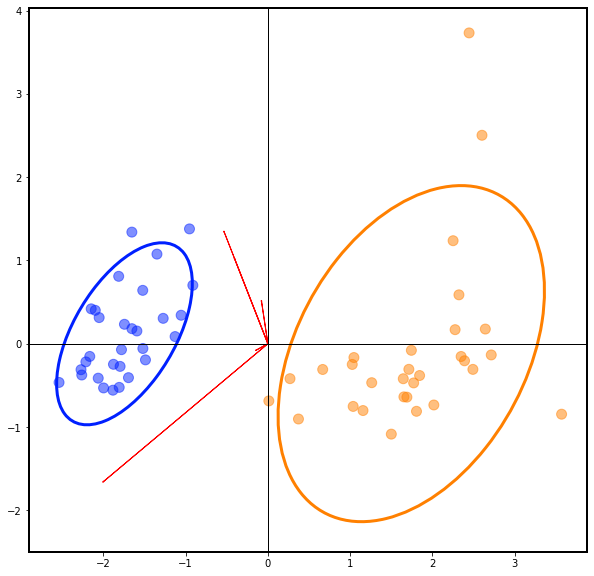

In [41]:
fig, axs = plt.subplots(figsize = [10,10])

axs.spines["top"].set_linewidth(2)
axs.spines["left"].set_linewidth(2)
axs.spines["right"].set_linewidth(2)
axs.spines["bottom"].set_linewidth(2)

palette = {"Control":"#0020ff", 
           "Dox":"#ff8000"}

plt.scatter (X_r[:,0], X_r[:,1], c=[palette[x] for x in labels], cmap=plt.cm.Set1, alpha = 0.5, s=100)

control_data = X_r[labels=="Control"]
dox_data = X_r[labels=="Dox"]

confidence_ellipse (control_data[:,0], control_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#0020ff", linewidth=3)
confidence_ellipse (dox_data[:,0], dox_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#ff8000", linewidth=3)

xs = X_r[0]
ys = X_r[1]

for i, varnames in enumerate (c_labels):
    plt.arrow (0, 0,
              xs[i],
              ys[i],
              color = 'r',
              head_width = 0.01)
#     plt.text(xs[i], ys[i], varnames, size = 15)
    
xmin, xmax = plt.xlim()
plt.xlim(xmin,xmax)
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x-x, c = 'black', linewidth = 1)

ymin, ymax = plt.ylim()
plt.ylim(ymin,ymax)
y = np.linspace(ymin, ymax, 1000)
plt.plot (y-y, y, c = 'black', linewidth = 1)
    
# axs.axes.xaxis.set_visible(False)
# axs.axes.yaxis.set_visible(False)

In [32]:
print(pca.explained_variance_ratio_)

[0.68838547 0.13012736 0.09794583 0.0645288  0.01901254]
